In [164]:
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from haversine import haversine

In [66]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("File Name: ", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Dimension', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)
    
    infile.close()
    return nodelist, placelist

In [94]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [95]:
def global_distance(nodes,n1,n2):
    distance = haversine((nodes[n1][0],nodes[n1][1]), (nodes[n2][0],nodes[n2][1]), unit='mi')
    return distance

In [247]:
def cooling_function(T):
    return T * 0.9999

In [248]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [249]:
def part_reversal(path, i, j):
    while (j > i):
        path[i], path[j] = path[j], path[i]
        i += 1
        j -= 1
    return path

In [277]:
def simulated_annealing(nodes, dist, n):
    # Initial Path
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    initial_path = path
    print("path cost before simulated annealing ", path_cost)
    iteration = 1000000
    temperature = 10000
    ran = 0.5
    for i in range(iteration):
#     while(True):
        rev = sample(range(len(nodes)),2)
        newpath = path.copy()
#         newpath = part_reversal(path, min(rev[0], rev[1]), max(rev[0], rev[1]))
        newpath[rev[0]:rev[1]+1] = newpath[rev[0]:rev[1]+1][::-1] # reverse sublist
        new_pathcost = get_path_cost(dist, newpath)
        
#         two_indices = random.sample(range(20),2)
#         # two_indices.sort()
#         next_path = path.copy()
#         next_path[two_indices[0]:two_indices[1]+1] = next_path[two_indices[0]:two_indices[1]+1][::-1] # reverse sublist
        
        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0
        if delE > 0:
            path = newpath.copy()
            path_cost = new_pathcost
        elif random() < prob:
            path = newpath.copy()
            path_cost = new_pathcost
#         print(path, path_cost)
        temperature = cooling_function(temperature)
#         temperature = temperature / (i+1)
        if(temperature < 1e-8):
            print(i)
            break
    return path, path_cost, initial_path

In [278]:
def graph(nodes, path):
    X = []
    Y = []
    length = len(path)
    for i in range(length):
        X.append(nodes[path[i]][0])
        Y.append(nodes[path[i]][1])
    X.append(nodes[path[0]][0])
    Y.append(nodes[path[0]][1])
    plt.plot(X,Y)
#     print(nodes[:][0:])
#     plt.plot(nodes[][0], nodes[:1])

File Name:  xqg237
Dimension 237
path cost before simulated annealing  12102.998180032535
276296
Execution Time: 26329816900
Initial Path: [112  98 113 206 197 192 178 147 200  44  73 106 203  29  34 213  79 170
  37  65  90 232   8 207 211 234  66 151 167 101 174 120  20  64  19  25
 139  99  92 210 165 231 109 222 157  54  46 187 161 202  41 228  35 100
 133 224  63  82 229 103 110 118 184   3   1 142  18  49  96 164 154  16
  48 128 122 130 218 126 125 189  93 114 220 127  76 123  95  32 175 136
 173  15 169 215 153 168 179  12  30  83  17 148  84  45 204  80  27 158
  60 166  94 236  74  13 115 107  43 155  78 135 146  36 131  88   4 201
  61  81 176 163 223  70 138 190 182  26 230 111  28 188 226 183 221  77
 199  53 194 121 235 141 217 186 149 129 195  71   9 116  75  39  14  68
   7 156 193  40 185 140 196  85 214 132 105 124  86  52  62  57 227   5
  42  47  89  50  24 150 171  38  67  87  33 216 145 119  69 159  31  51
 205 208  56  11 143 191 152 134 212 108 198 181 209 137 1

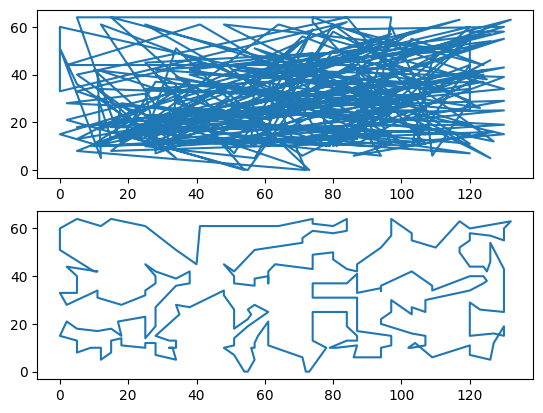

In [280]:
def main():
    # generate_random_coords(100)
    nodes, place = tsp_read("Data/xqg237.tsp")
    coords = np.array(nodes) 
    n = len(coords)
    # Distance Array
    dist = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(i+1, n):
            dist[i, j] = euclidean_distance(nodes, i, j)
            dist[j, i] = dist[i, j]

    start = time.time_ns()
    best_path, best_cost, initial_path = simulated_annealing(nodes, dist, n)
    end = time.time_ns()
    print('Execution Time:', end-start)
    print('Initial Path:', initial_path)
    print('Best Path:', best_path)
    print('Best Cost:', best_cost)
    plt.subplot(2, 1, 1)
    graph(nodes, initial_path)
    plt.subplot(2, 1, 2)
    graph(nodes, best_path)
    plt.show


if __name__ == "__main__":
    main()